<a href="https://colab.research.google.com/github/DmitriyKolesnikM8O/ML/blob/main/hw2/hw2_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

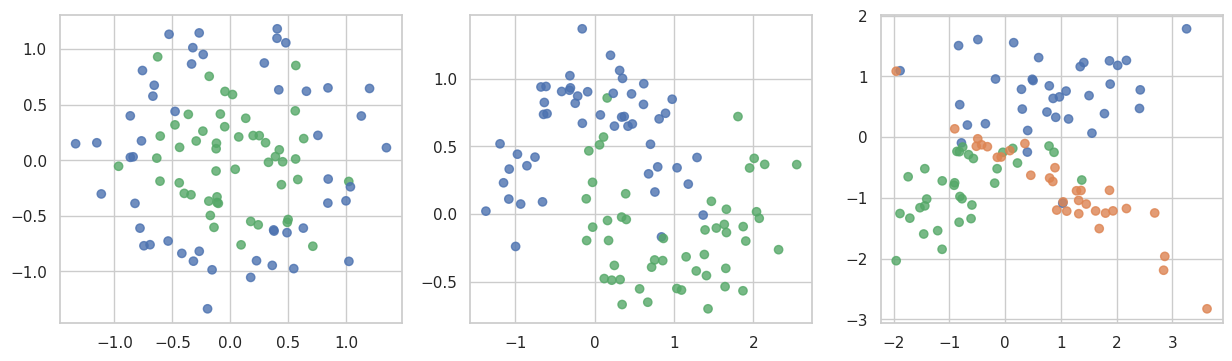

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

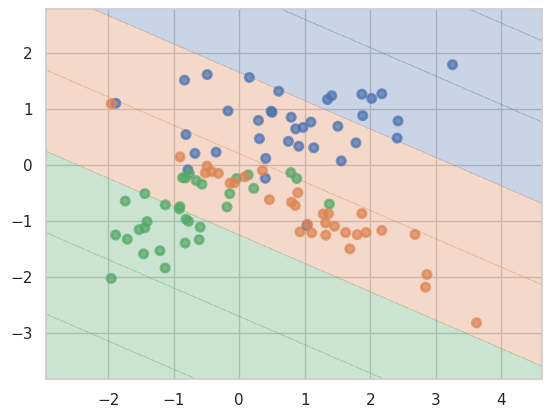

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет №1
Итоговая глубина дерева: 6
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.733

Детальный отчет по тестовой выборке:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.75      0.73      0.74        30




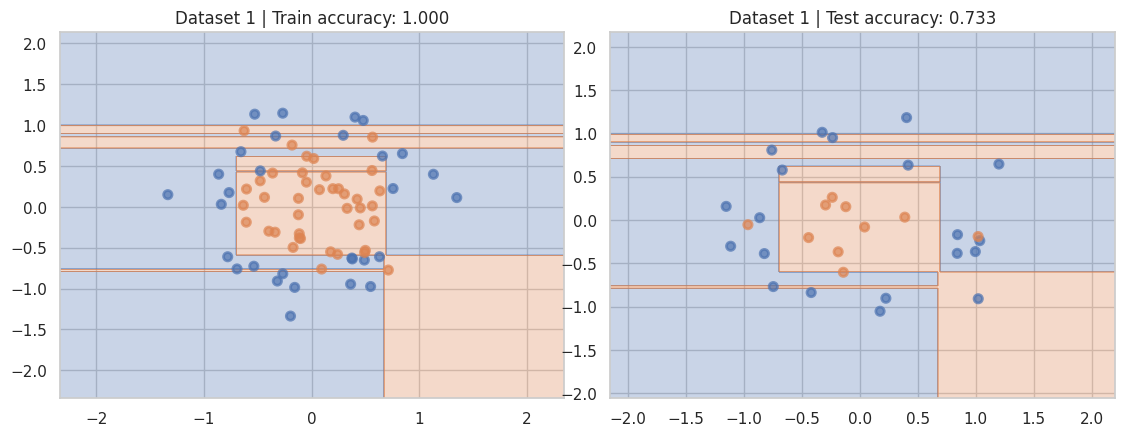

Датасет №2
Итоговая глубина дерева: 4
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.867

Детальный отчет по тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30




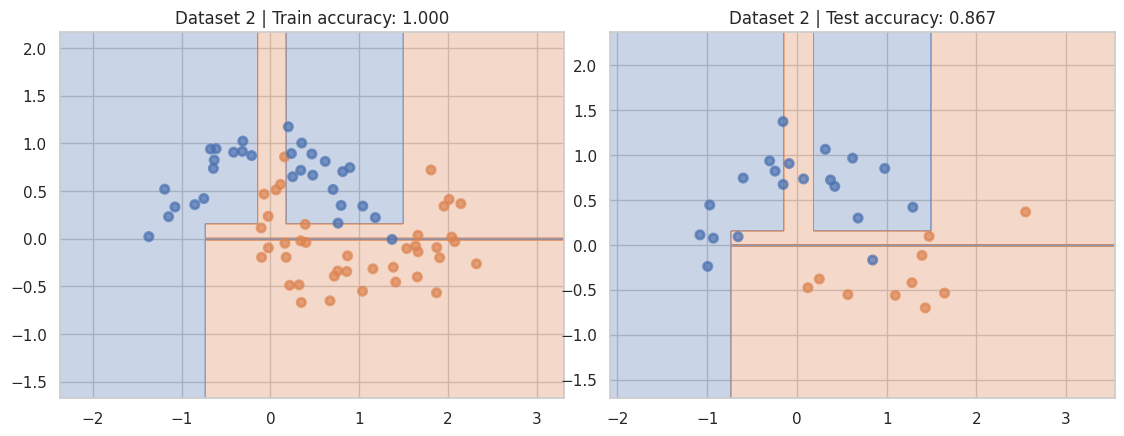

Датасет №3
Итоговая глубина дерева: 7
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.833

Детальный отчет по тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.80      0.80      0.80        10
           2       0.67      0.80      0.73         5

    accuracy                           0.83        30
   macro avg       0.80      0.82      0.81        30
weighted avg       0.84      0.83      0.84        30




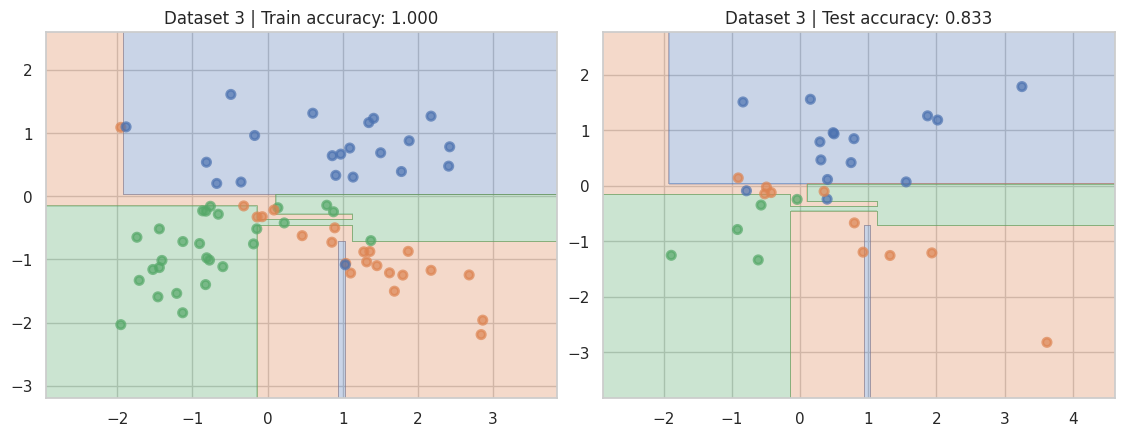

In [10]:
from sklearn.metrics import accuracy_score, classification_report

for i, (X, y) in enumerate(datasets):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)

    tree_depth = tree_clf.get_depth()

    train_preds = tree_clf.predict(X_train)
    test_preds = tree_clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    test_report = classification_report(y_test, test_preds, zero_division=0)

    print(f"Датасет №{i+1}")
    print(f"Итоговая глубина дерева: {tree_depth}")
    print(f"Accuracy на обучающей выборке: {train_accuracy:.3f}")
    print(f"Accuracy на тестовой выборке: {test_accuracy:.3f}\n")
    print("Детальный отчет по тестовой выборке:")
    print(test_report)
    print("="*50 + "\n")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plot_surface(tree_clf, X_train, y_train)
    plt.title(f'Dataset {i+1} | Train accuracy: {train_accuracy:.3f}')

    plt.subplot(1, 2, 2)
    plot_surface(tree_clf, X_test, y_test)
    plt.title(f'Dataset {i+1} | Test accuracy: {test_accuracy:.3f}')

    plt.show()

__Ответ:__
Все грустно :(
Наши деревья переобучены. Почему? Пара моментов:
- на train у всех 1, в тестах беда
- вроде как глубина 6 и 7 считается большой, а значит моделька построила много сложных правил
- разделяющие поверхности выглядят неважно

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Анализируем  1 датасет

Итогииии:
Лучший результат на тесте: 0.900
Параметры лучшей модели: max_depth=5, min_samples_leaf=5

Полная таблица результатов:
   depth  leaf_size  train_acc  test_acc
0      2          1   0.828571  0.633333
1      2          5   0.814286  0.666667
2      2         10   0.814286  0.666667
3      3          1   0.885714  0.733333
4      3          5   0.857143  0.800000
5      3         10   0.814286  0.766667
6      5          1   0.971429  0.766667
7      5          5   0.871429  0.900000
8      5         10   0.814286  0.766667
9   None          1   1.000000  0.733333
10  None          5   0.871429  0.900000
11  None         10   0.814286  0.766667


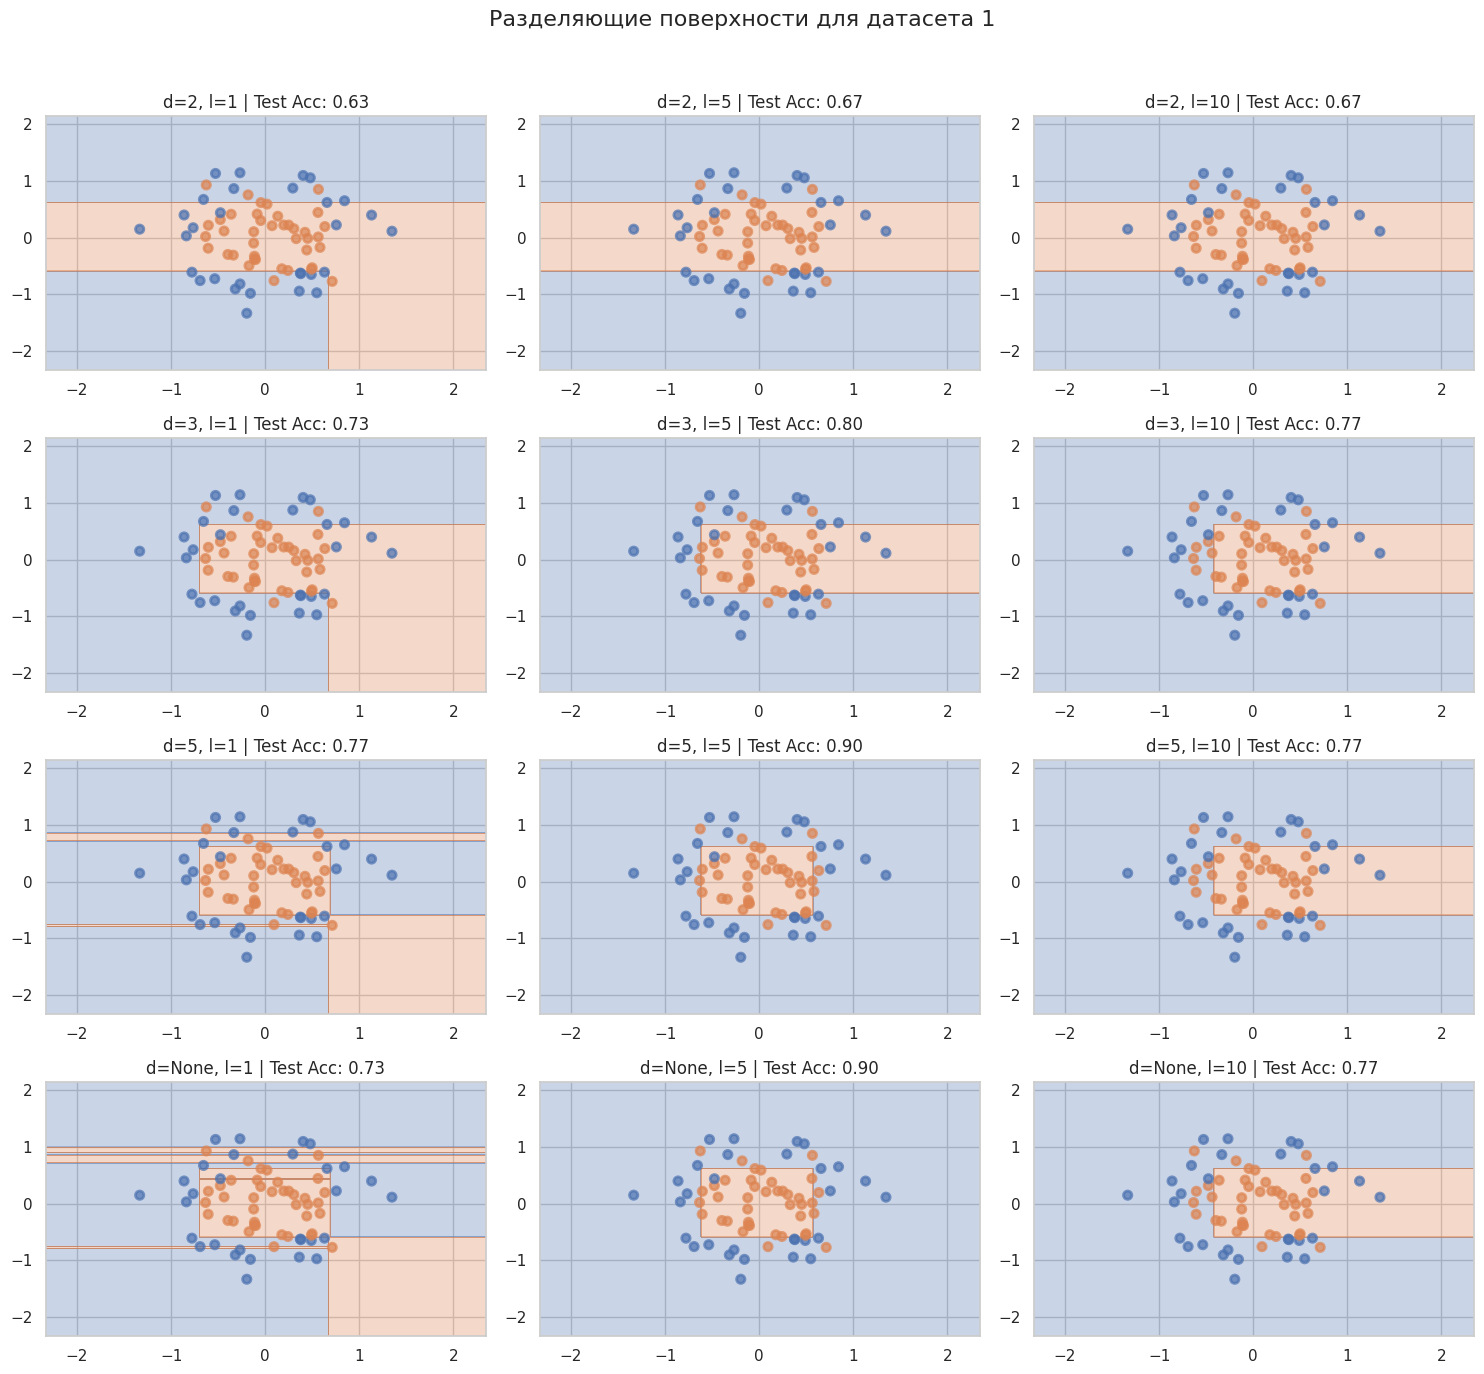

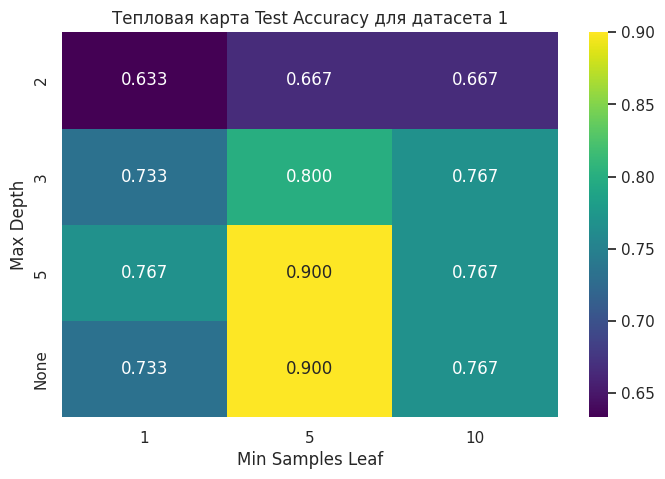




Анализируем  2 датасет

Итогииии:
Лучший результат на тесте: 0.933
Параметры лучшей модели: max_depth=2, min_samples_leaf=1

Полная таблица результатов:
   depth  leaf_size  train_acc  test_acc
0      2          1   0.914286  0.933333
1      2          5   0.885714  0.800000
2      2         10   0.842857  0.800000
3      3          1   0.914286  0.933333
4      3          5   0.885714  0.800000
5      3         10   0.871429  0.766667
6      5          1   1.000000  0.866667
7      5          5   0.957143  0.733333
8      5         10   0.871429  0.766667
9   None          1   1.000000  0.866667
10  None          5   0.957143  0.733333
11  None         10   0.871429  0.766667


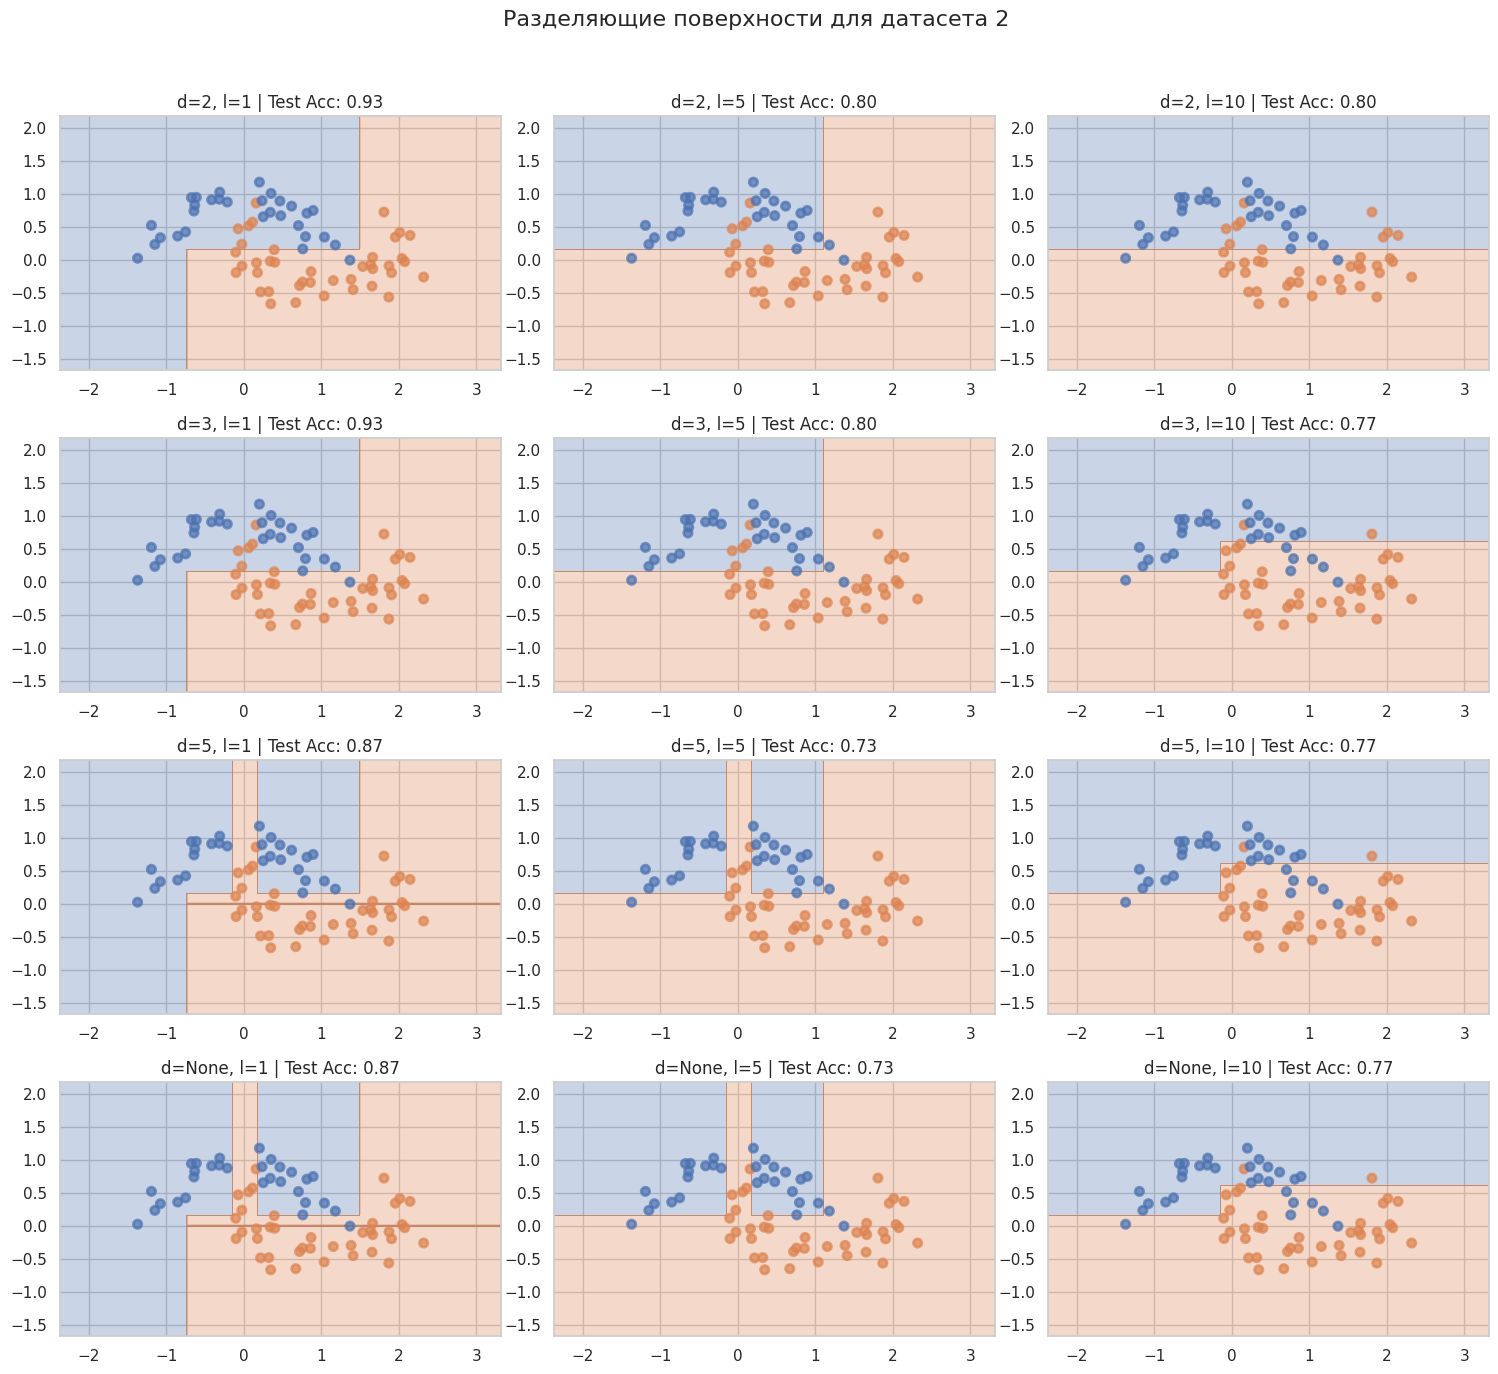

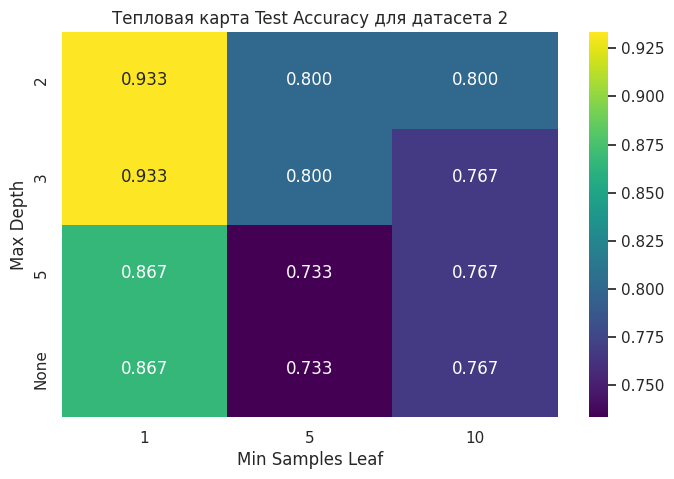




Анализируем  3 датасет

Итогииии:
Лучший результат на тесте: 0.867
Параметры лучшей модели: max_depth=3, min_samples_leaf=1

Полная таблица результатов:
   depth  leaf_size  train_acc  test_acc
0      2          1   0.900000  0.766667
1      2          5   0.885714  0.766667
2      2         10   0.885714  0.766667
3      3          1   0.942857  0.866667
4      3          5   0.885714  0.766667
5      3         10   0.885714  0.766667
6      5          1   0.971429  0.800000
7      5          5   0.900000  0.700000
8      5         10   0.885714  0.766667
9   None          1   1.000000  0.833333
10  None          5   0.900000  0.700000
11  None         10   0.885714  0.766667


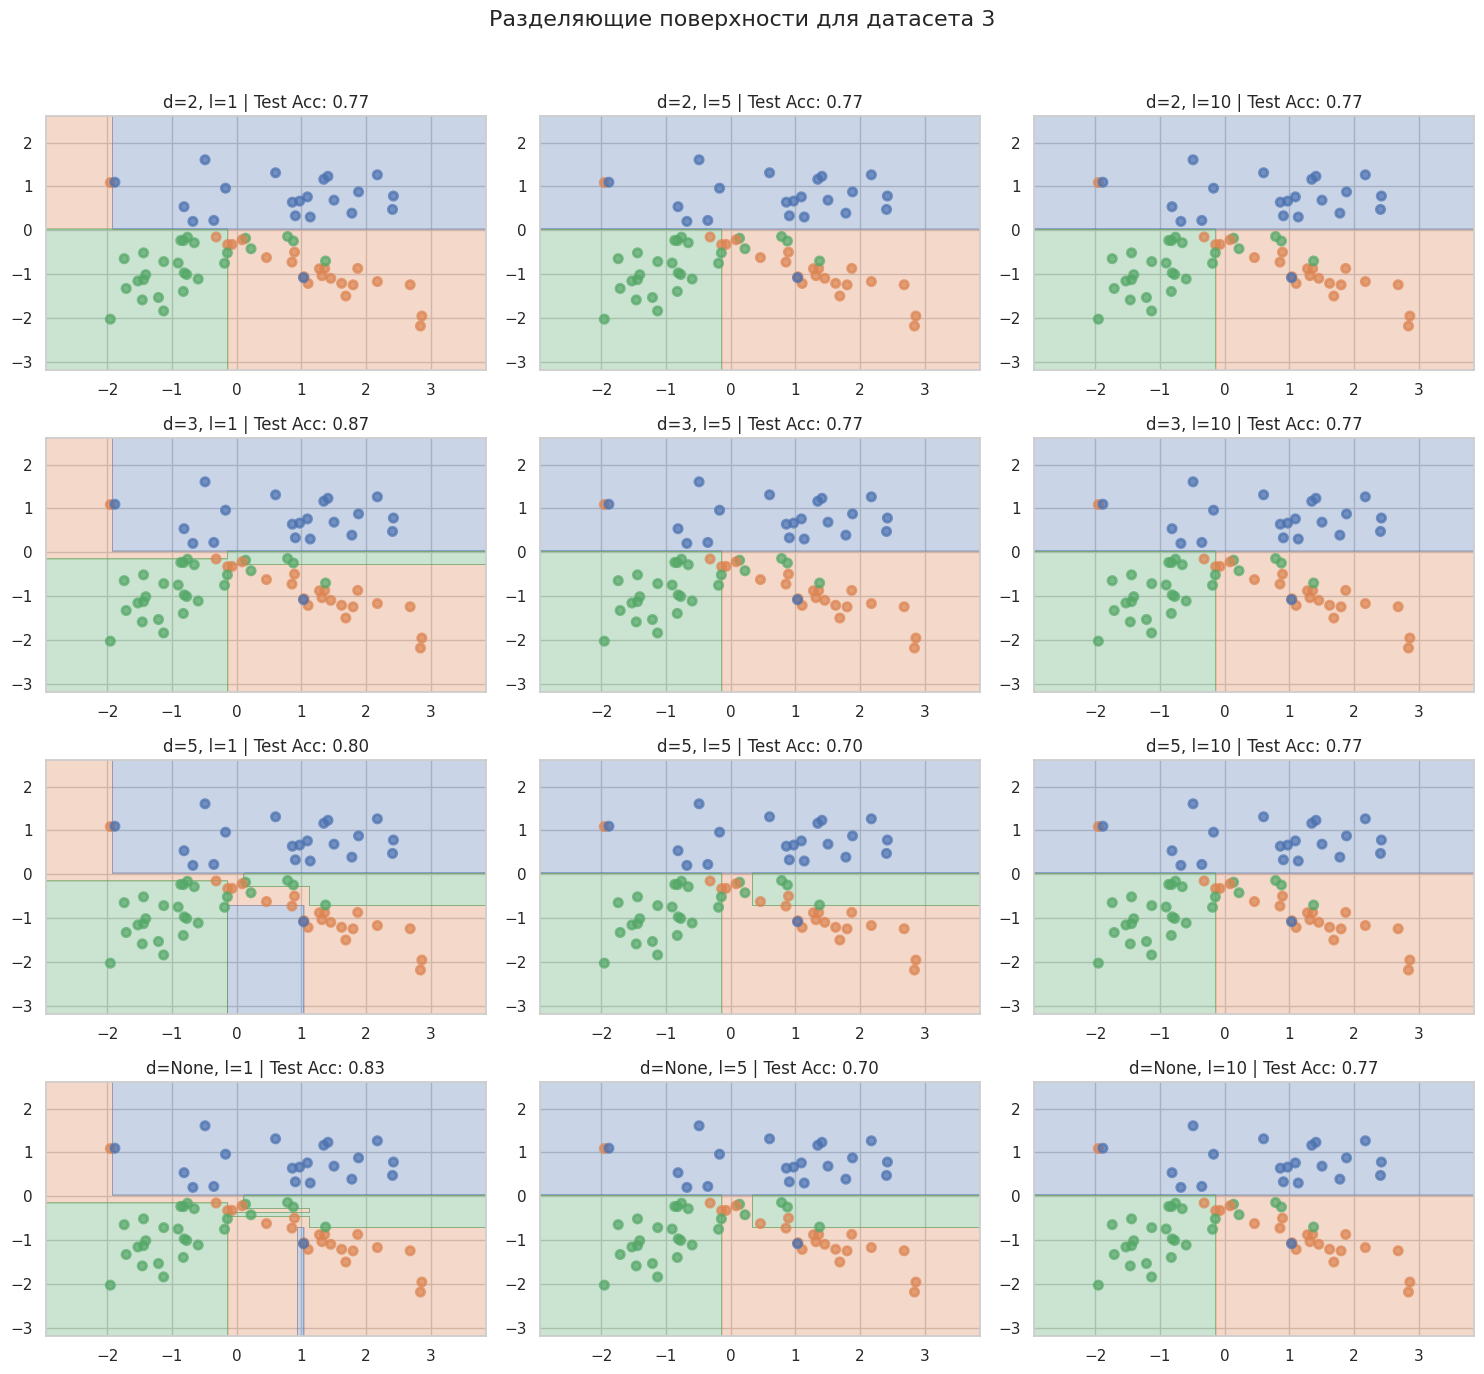

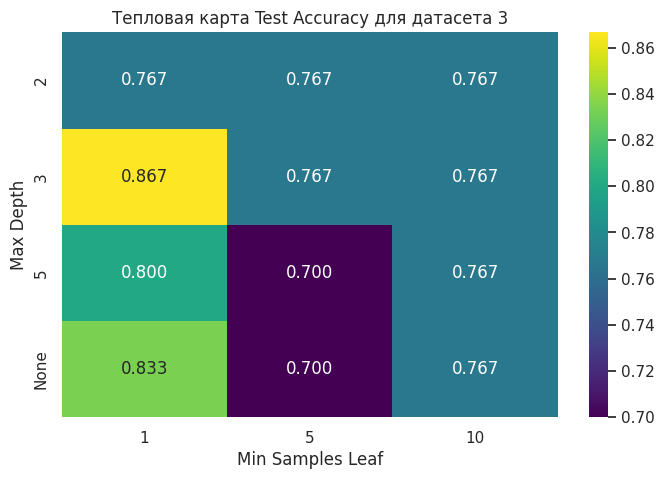

In [11]:
from sklearn.metrics import accuracy_score
import pandas as pd

def plot_surface_on_ax(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_leaf': [1, 5, 10]
}

for i, (X, y) in enumerate(datasets):
    print(f"Анализируем  {i + 1} датасет")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    results = []

    for depth in param_grid['max_depth']:
        for leaf_size in param_grid['min_samples_leaf']:
            model = DecisionTreeClassifier(max_depth=depth,
                                           min_samples_leaf=leaf_size,
                                           random_state=42)
            model.fit(X_train, y_train)

            train_acc = accuracy_score(y_train, model.predict(X_train))
            test_acc = accuracy_score(y_test, model.predict(X_test))

            results.append({
                'depth': depth if depth is not None else 'None',
                'leaf_size': leaf_size,
                'train_acc': train_acc,
                'test_acc': test_acc
            })

    results_df = pd.DataFrame(results)
    best_params = results_df.loc[results_df['test_acc'].idxmax()]

    print("\nИтогииии:")
    print(f"Лучший результат на тесте: {best_params['test_acc']:.3f}")
    print(f"Параметры лучшей модели: max_depth={best_params['depth']}, min_samples_leaf={best_params['leaf_size']}")
    print("\nПолная таблица результатов:")
    print(results_df.to_string())

    fig, axes = plt.subplots(len(param_grid['max_depth']),
                             len(param_grid['min_samples_leaf']),
                             figsize=(15, 14))
    fig.suptitle(f'Разделяющие поверхности для датасета {i+1}', fontsize=16)

    for i_depth, depth in enumerate(param_grid['max_depth']):
        for i_leaf, leaf_size in enumerate(param_grid['min_samples_leaf']):
            ax = axes[i_depth, i_leaf]

            model = DecisionTreeClassifier(max_depth=depth,
                                           min_samples_leaf=leaf_size,
                                           random_state=42)
            model.fit(X_train, y_train)

            test_acc = accuracy_score(y_test, model.predict(X_test))

            plot_surface_on_ax(model, X_train, y_train, ax)

            depth_str = 'None' if depth is None else str(depth)
            ax.set_title(f"d={depth_str}, l={leaf_size} | Test Acc: {test_acc:.2f}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    heatmap_data = results_df.pivot(index='depth', columns='leaf_size', values='test_acc')

    plt.figure(figsize=(8, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
    plt.title(f'Тепловая карта Test Accuracy для датасета {i+1}')
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Max Depth')
    plt.show()

    print("\n\n")

__Ответ:__ Регуляризация - норм темка, улучшаем качество датасета, снизилось переобусение. Но вот какие параметры нужны зависит уже от структуры данных.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

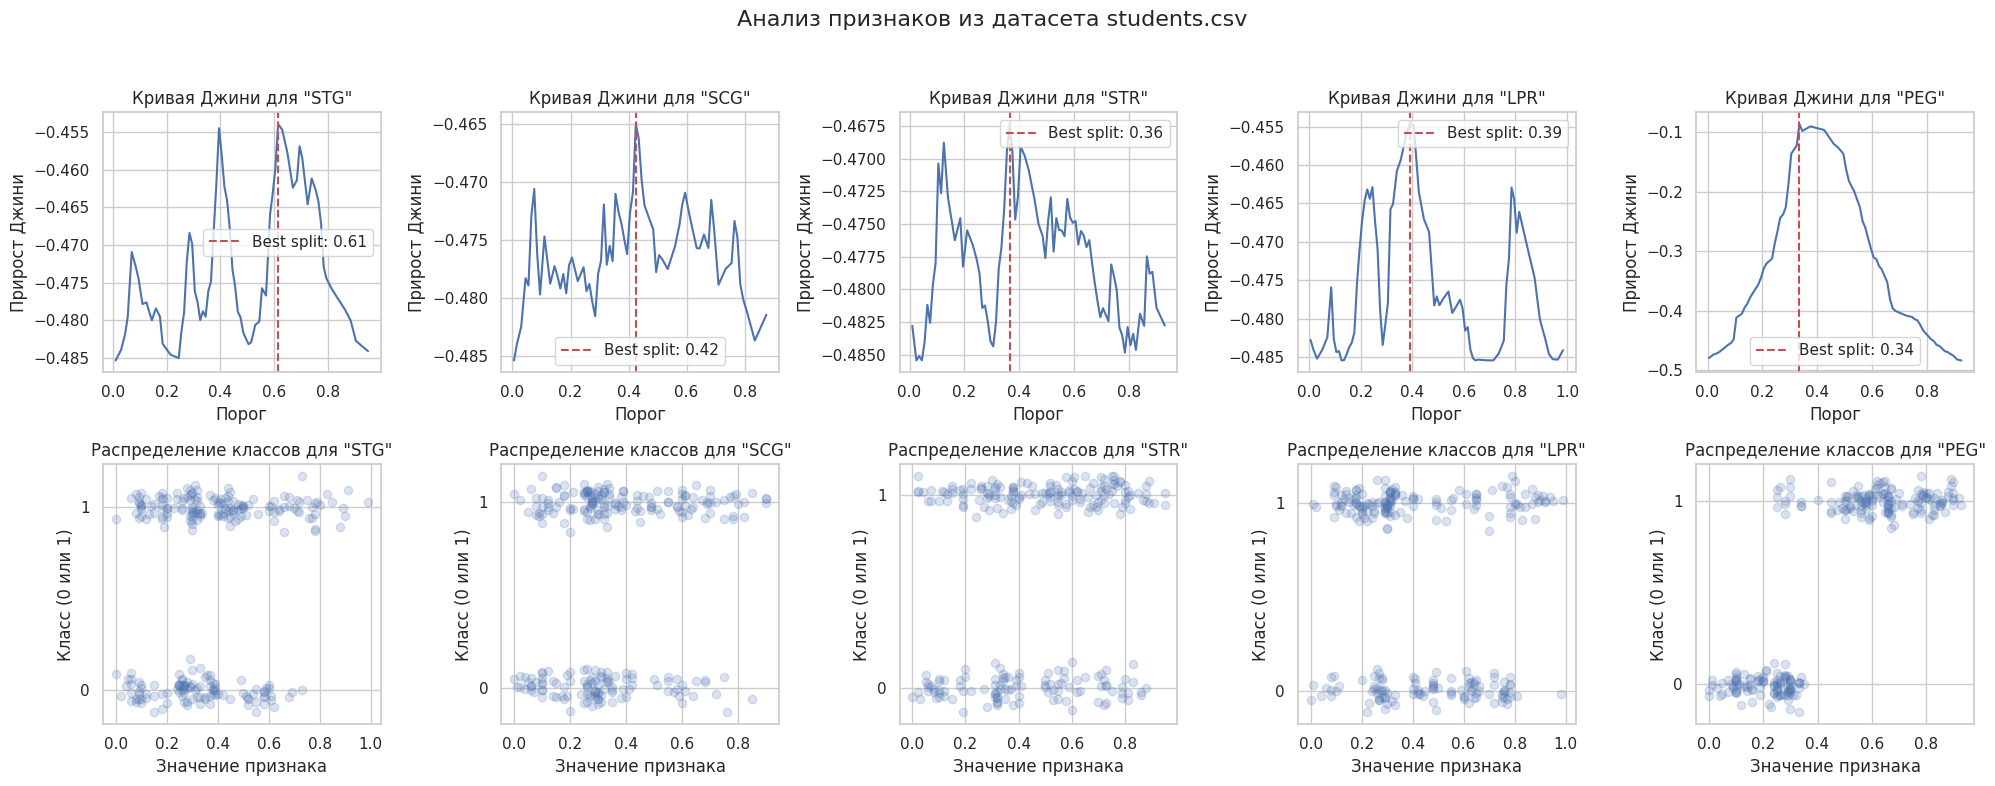

In [13]:
import sys
sys.path.append('.')
import pandas as pd
import matplotlib.pyplot as plt
from hw2code import find_best_split

try:
    students_df = pd.read_csv('students.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'students.csv' не найден. Убедитесь, что он лежит в той же папке.")
    students_df = pd.read_csv('students.csv')

X = students_df.iloc[:, :-1].values
y = students_df.iloc[:, -1].values
feature_names = students_df.columns[:-1]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Анализ признаков из датасета students.csv', fontsize=16)

for i, feature_name in enumerate(feature_names):
    feature_vector = X[:, i]

    ax1 = axes[0, i]
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, y)

    if thresholds is not None:
        ax1.plot(thresholds, ginis)
        ax1.axvline(threshold_best, color='r', linestyle='--', label=f'Best split: {threshold_best:.2f}')
        ax1.set_title(f'Кривая Джини для "{feature_name}"')
        ax1.set_xlabel('Порог')
        ax1.set_ylabel('Прирост Джини')
        ax1.legend()
    else:
        ax1.set_title(f'Нет сплитов для "{feature_name}"')

    ax2 = axes[1, i]
    y_jittered = y + np.random.normal(0, 0.05, size=y.shape)
    ax2.scatter(feature_vector, y_jittered, alpha=0.2)
    ax2.set_title(f'Распределение классов для "{feature_name}"')
    ax2.set_xlabel('Значение признака')
    ax2.set_ylabel('Класс (0 или 1)')
    ax2.set_yticks([0, 1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Признак REG - самый хайповый.     

Да, это полностью согласуется со scatter-графиками. На графике для PEG классы визуально хорошо разделены, в отличие от остальных, где точки сильно перемешаны.

Для хороших признаков кривая Джини - 1 высокий, гладкий пик. Для плохих признаков тут скорее какая-то пила с кучей пиков, то есть даже нет явного порога для разделения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [15]:
print("""
Че нашел:
1. Неправильный критерий останова (не работала проверка на один класс в листе).
2. Пропускался первый признак в цикле (feature 0).
3. Ошибки в обработке категориальных признаков (деление на 0, опечатка "Categorical").
4. Неверная передача меток (y) в правое поддерево при рекурсии.
5. Неправильное извлечение класса в терминальном узле (листе).
""")


Че нашел:
1. Неправильный критерий останова (не работала проверка на один класс в листе).
2. Пропускался первый признак в цикле (feature 0).
3. Ошибки в обработке категориальных признаков (деление на 0, опечатка "Categorical").
4. Неверная передача меток (y) в правое поддерево при рекурсии.
5. Неправильное извлечение класса в терминальном узле (листе).



__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [18]:
import sys
sys.path.append('.')
import importlib
import hw2code
importlib.reload(hw2code)

from hw2code import DecisionTree
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

try:
    mushrooms_df = pd.read_csv('agaricus-lepiota.data', header=None)
except FileNotFoundError:
    print("Файл 'agaricus-lepiota.data' не найден.")

print("Первые 5 строк МУХОМОРОВ, БЕЛЫХ, ЛИСИЧЕК, КИРИЕШЕК:")
print(mushrooms_df.head())
print("\n")

encoded_df = mushrooms_df.copy()
for col in encoded_df.columns:
    encoder = LabelEncoder()
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

X = encoded_df.iloc[:, 1:].values
y = encoded_df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

num_features = X_train.shape[1]
feature_types = ['categorical'] * num_features
my_tree = DecisionTree(feature_types=feature_types)
my_tree.fit(X_train, y_train)
predictions = my_tree.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Мое дерево:")
total_test_samples = len(y_test)
correctly_classified = int(accuracy * total_test_samples)

print(f"Accuracy: {accuracy:.4f}")
print(f"Правильно классифицировано: {correctly_classified}/{total_test_samples}")
print("\n")

sklearn_tree = DecisionTreeClassifier(random_state=42)
sklearn_tree.fit(X_train, y_train)
sklearn_preds = sklearn_tree.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_preds)

print("Дерево из sklearn")
print(f"Accuracy: {sklearn_accuracy:.4f}")
print(f"Глубина: {sklearn_tree.get_depth()}")

Первые 5 строк МУХОМОРОВ, БЕЛЫХ, ЛИСИЧЕК, КИРИЕШЕК:
  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]


Мое дерево:
Accuracy: 1.0000
Правильно классифицировано: 4062/4062


Дерево из sklearn
Accuracy: 1.0000
Глубина: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [19]:
print("СДЕЛАНО, DONE, ALL DONE")

СДЕЛАНО, DONE, ALL DONE


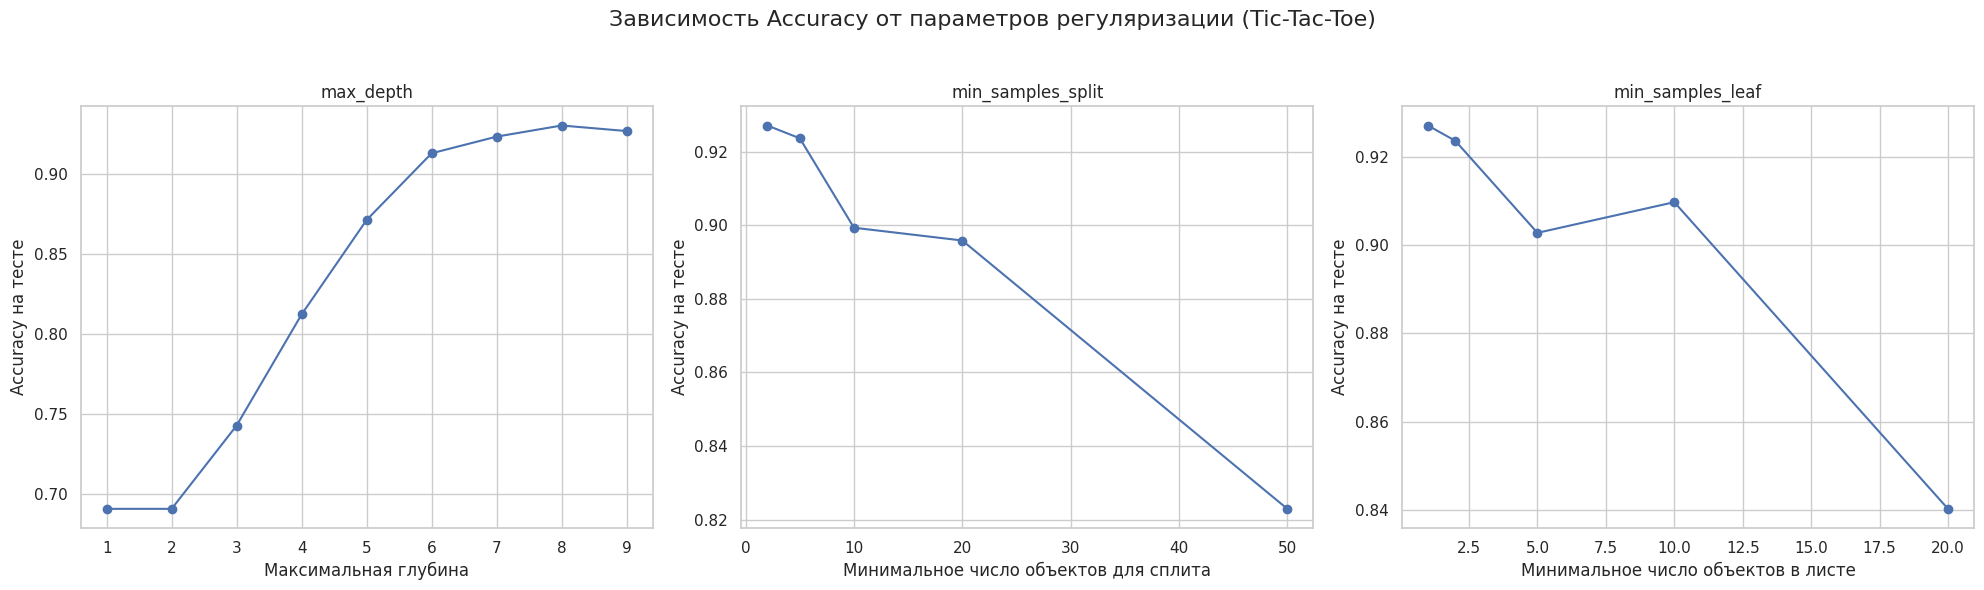

In [21]:
# Вся моя жизнь - копипаст импортов в каждую ячейку, я не вижу цели в жизни без этого
# И кстати - как убрать это мерзкое подсвечивание у hw2code? import sys для этого сделан - не помог
import sys
sys.path.append('.')
import importlib
import hw2code
importlib.reload(hw2code)

from hw2code import DecisionTree
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

try:
    tictactoe_df = pd.read_csv('tic-tac-toe-endgame.csv')
except FileNotFoundError:
    print("Файл 'tic-tac-toe-endgame.csv' не найден. Проверь путь.")

encoded_ttt_df = tictactoe_df.apply(LabelEncoder().fit_transform)

X_ttt = encoded_ttt_df.iloc[:, :-1].values
y_ttt = encoded_ttt_df.iloc[:, -1].values
X_train_ttt, X_test_ttt, y_train_ttt, y_test_ttt = train_test_split(X_ttt, y_ttt, test_size=0.3, random_state=42)

feature_types_ttt = ['categorical'] * X_ttt.shape[1]

depths = range(1, 10)
splits = [2, 5, 10, 20, 50]
leafs = [1, 2, 5, 10, 20]

results_depth = []
for depth in depths:
    tree = DecisionTree(feature_types=feature_types_ttt, max_depth=depth)
    tree.fit(X_train_ttt, y_train_ttt)
    acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    results_depth.append(acc)

results_split = []
for split_val in splits:
    tree = DecisionTree(feature_types=feature_types_ttt, min_samples_split=split_val)
    tree.fit(X_train_ttt, y_train_ttt)
    acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    results_split.append(acc)

results_leaf = []
for leaf_val in leafs:
    tree = DecisionTree(feature_types=feature_types_ttt, min_samples_leaf=leaf_val)
    tree.fit(X_train_ttt, y_train_ttt)
    acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    results_leaf.append(acc)


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Зависимость Accuracy от параметров регуляризации (Tic-Tac-Toe)', fontsize=16)

axes[0].plot(depths, results_depth, marker='o')
axes[0].set_title('max_depth')
axes[0].set_xlabel('Максимальная глубина')
axes[0].set_ylabel('Accuracy на тесте')
axes[0].grid(True)
axes[1].plot(splits, results_split, marker='o')
axes[1].set_title('min_samples_split')
axes[1].set_xlabel('Минимальное число объектов для сплита')
axes[1].set_ylabel('Accuracy на тесте')
axes[1].grid(True)
axes[2].plot(leafs, results_leaf, marker='o')
axes[2].set_title('min_samples_leaf')
axes[2].set_xlabel('Минимальное число объектов в листе')
axes[2].set_ylabel('Accuracy на тесте')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [24]:
import sys
sys.path.append('.')
import importlib
import hw2code
importlib.reload(hw2code)

from hw2code import DecisionTree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

def prepare_mushrooms():
    df = pd.read_csv('agaricus-lepiota.data', header=None)
    df = df.apply(LabelEncoder().fit_transform)
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
    return X, y

def prepare_tictactoe():
    df = pd.read_csv('tic-tac-toe-endgame.csv')
    df = df.apply(LabelEncoder().fit_transform)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

def prepare_cars():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
    df = pd.read_csv(url, header=None)


    X_df = df.iloc[:, :-1].apply(LabelEncoder().fit_transform)
    X = X_df.values

    y = df.iloc[:, -1].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}).values
    return X, y

def prepare_nursery():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
    df = pd.read_csv(url, header=None)
    df.iloc[:, -1] = df.iloc[:, -1].replace('more', 'not_recom')

    X_df = df.iloc[:, :-1].apply(LabelEncoder().fit_transform)
    X = X_df.values

    y = df.iloc[:, -1].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}).values
    return X, y

datasets_to_test = {
    "mushrooms": prepare_mushrooms,
    "tic-tac-toe": prepare_tictactoe,
    "cars": prepare_cars,
    "nursery": prepare_nursery
}

results = {}
scorer = make_scorer(accuracy_score)

for name, prepare_func in datasets_to_test.items():
    X, y = prepare_func()

    my_tree_real = DecisionTree(feature_types=['real'] * X.shape[1])
    acc_real = cross_val_score(my_tree_real, X, y, cv=10, scoring=scorer).mean()

    my_tree_cat = DecisionTree(feature_types=['categorical'] * X.shape[1])
    acc_cat = cross_val_score(my_tree_cat, X, y, cv=10, scoring=scorer).mean()

    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_ohe = ohe.fit_transform(X)
    my_tree_ohe = DecisionTree(feature_types=['real'] * X_ohe.shape[1])
    acc_ohe = cross_val_score(my_tree_ohe, X_ohe, y, cv=10, scoring=scorer).mean()

    sklearn_tree = DecisionTreeClassifier(random_state=42)
    acc_sklearn = cross_val_score(sklearn_tree, X, y, cv=10, scoring=scorer).mean()

    results[name] = {
        "MyTree (real)": acc_real,
        "MyTree (categorical)": acc_cat,
        "MyTree (OHE)": acc_ohe,
        "Sklearn Tree": acc_sklearn
    }

results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n\n--- Итоговая таблица Accuracy (cv=10) ---")
print(results_df)




--- Итоговая таблица Accuracy (cv=10) ---
             MyTree (real)  MyTree (categorical)  MyTree (OHE)  Sklearn Tree
mushrooms           0.9993                1.0000        0.9996        0.9604
tic-tac-toe         0.4675                0.5415        0.5436        0.7717
cars                0.9426                0.9675        0.9195        0.9427
nursery             0.9997                0.9998        0.9995        0.9997


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Прям по пунктам распишу:



1.    Ранжирование алгоритмов: Нет, оно разное. На mushrooms, cars, nursery моя реализация (MyTree (categorical)) самая маевская. На tic-tac-toe она сильно проигрывает Sklearn Tree, 3 факультет победил.
2.   Почему так-то? На mushrooms и cars, НАВЕРНОЕ, признаки простые, и моя реализация хорошо находит прямые зависимости.
На tic-tac-toe, СКОРЕЕ ВСЕГО, важны комбинации признаков (три в ряд). и тут я уже бессилен
3. Случайность: Да, присутствует из-за случайного разбиения данных в cross_val_score. Если запустить код несколько раз, цифры немного изменятся (я пробовал, честно-честно).
4. Че улучшить? Снизить случайность: Зафиксировать random_state в cross_val_score.
Улучшить алгоритмы: Подобрать гиперпараметры или использовать че-нибудь другое.




Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
Так, дерево я уже посадил.
Надеюсь в 3 дз будет дом и сын